In [1]:
from huggingface_hub import HfApi

# Initialize the API
api = HfApi()

# List models with a limit of 5, sorted by downloads
models = api.list_models(
    filter="document-question-answering",
    limit=5,
    sort="downloads",
    full=True  # Include all model card metadata
)

# Print the model name, downloads, and size
print("Top 5 Models by Downloads and Their Sizes:\n")
for model in models:
    # Access downloads and model size in bytes
    downloads = model.downloads

    print(f"Model: {model.modelId}, Downloads: {downloads}")

Top 5 Models by Downloads and Their Sizes:

Model: fxmarty/tiny-doc-qa-vision-encoder-decoder, Downloads: 236730
Model: impira/layoutlm-document-qa, Downloads: 59894
Model: naver-clova-ix/donut-base-finetuned-docvqa, Downloads: 10061
Model: impira/layoutlm-invoices, Downloads: 6291
Model: rubentito/layoutlmv3-base-mpdocvqa, Downloads: 851


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [1]:
from transformers import pipeline
task = pipeline(task='document-question-answering', model='naver-clova-ix/donut-base-finetuned-docvqa')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Config of the encoder: <class 'transformers.models.donut.modeling_donut_swin.DonutSwinModel'> is overwritten by shared encoder config: DonutSwinConfig {
  "attention_probs_dropout_prob": 0.0,
  "depths": [
    2,
    2,
    14,
    2
  ],
  "drop_path_rate": 0.1,
  "embed_dim": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": [
    2560,
    1920
  ],
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-05,
  "mlp_ratio": 4.0,
  "

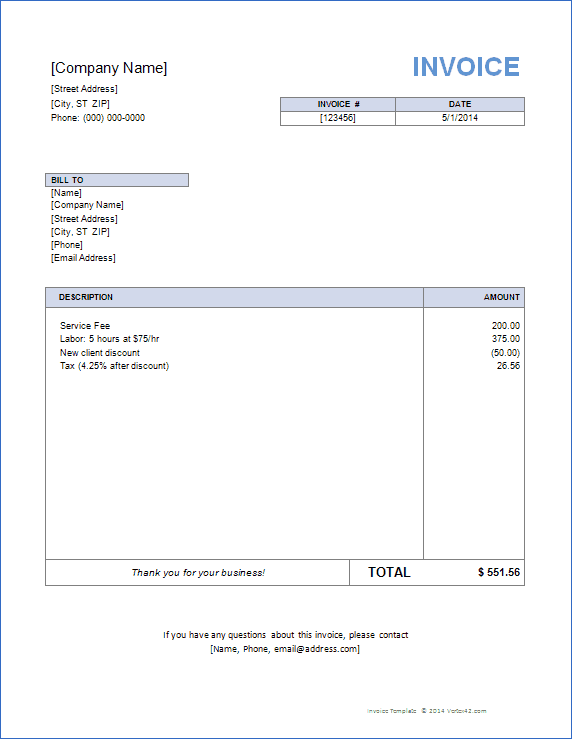

In [2]:
from PIL import Image
image = Image.open('/content/word-invoice-template.png')
image

In [3]:
output = task(image = image,
              question = 'Total bill amount')
for res in output:
    print(res)

MBartModel is using MBartSdpaAttention, but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True` or `layer_head_mask` not None. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


{'answer': '$ 551.56'}


In [4]:
output = task(image = image,
              question = 'Did you find any email address in this')
for res in output:
    print(res)

{'answer': 'name'}


In [5]:
output = task(image = image,
              question = 'What is the invoice date?')
for res in output:
    print(res)

{'answer': '5/1/2014'}
